# 예제 4.2
## 고르게 편극된 반지름이 R인 공이 만드는 전기장을 구하여라.

### 풀이과정

ㅁㄴㅇㄹㄹ

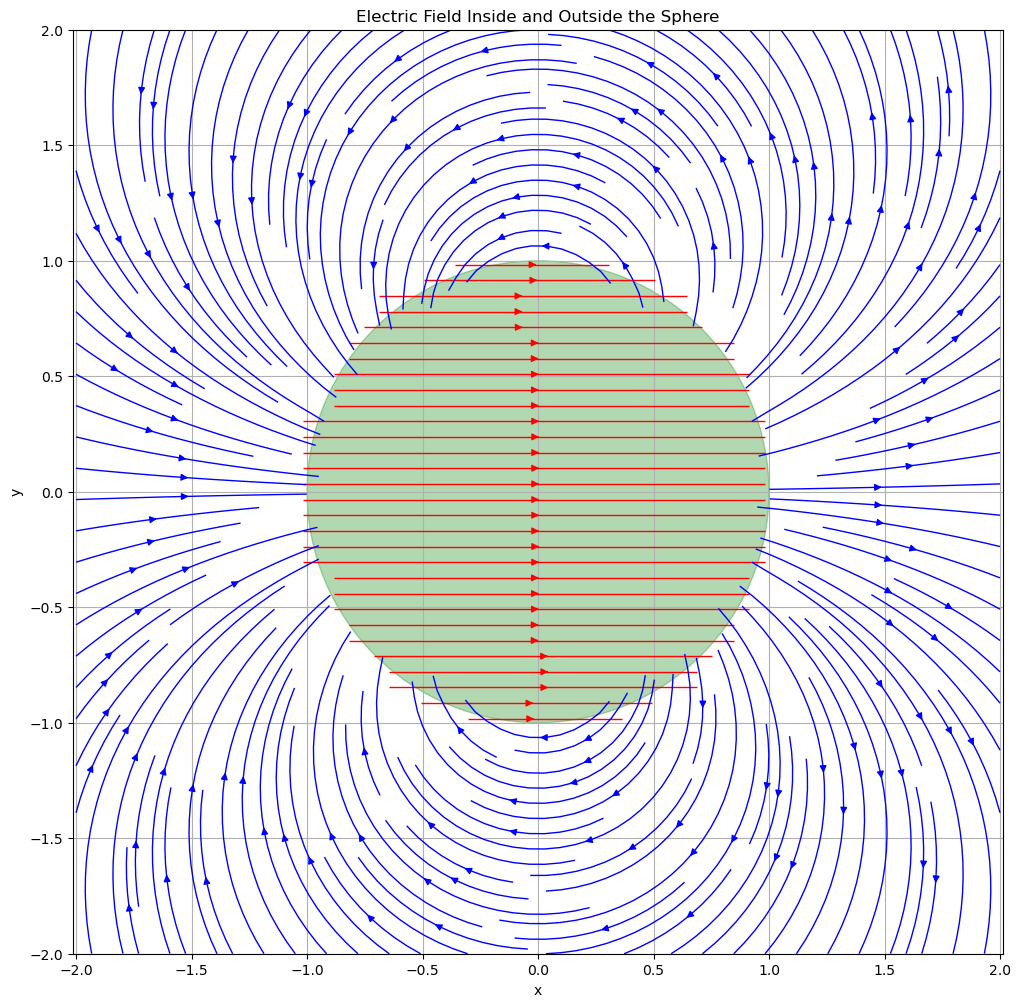

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 상수 설정
P = 1.0  # 전기 쌍극자 모멘트
eps0 = 1.0  # 진공 유전율
R = 1.0  # 구의 반지름

# 직교 좌표계에서 균일한 격자 생성
x = np.linspace(-2*R, 2*R, 50)
y = np.linspace(-2*R, 2*R, 50)
X, Y = np.meshgrid(x, y)

# 극좌표계로 변환
r_grid = np.sqrt(X**2 + Y**2)
theta_grid = np.arctan2(Y, X)

# 내부 전기장 계산 (r cos θ 사용)
E_r_internal = np.zeros_like(r_grid)
E_theta_internal = np.zeros_like(r_grid)

mask_internal = r_grid <= R
E_r_internal[mask_internal] = P/(3*eps0) * np.cos(theta_grid[mask_internal])
E_theta_internal[mask_internal] = -P/(3*eps0) * np.sin(theta_grid[mask_internal])

# 내부 전기장을 직교 좌표계로 변환
E_x_internal = E_r_internal*np.cos(theta_grid) - E_theta_internal*np.sin(theta_grid)
E_y_internal = E_r_internal*np.sin(theta_grid) + E_theta_internal*np.cos(theta_grid)

# 외부 전기장 계산
E_r_external = np.zeros_like(r_grid)
E_theta_external = np.zeros_like(r_grid)

mask_external = r_grid > R
E_r_external[mask_external] = -1/(4*np.pi*eps0) * (-2*P*np.cos(theta_grid[mask_external]))/(r_grid[mask_external]**3)
E_theta_external[mask_external] = -1/(4*np.pi*eps0) * (-P*np.sin(theta_grid[mask_external]))/(r_grid[mask_external]**2)

# 외부 전기장을 직교 좌표계로 변환
E_x_external = E_r_external*np.cos(theta_grid) - E_theta_external*np.sin(theta_grid)
E_y_external = E_r_external*np.sin(theta_grid) + E_theta_external*np.cos(theta_grid)

# 시각화
plt.figure(figsize=(12, 12))

# 내부 전기장 시각화
plt.streamplot(x, y, E_x_internal, E_y_internal, color='red', linewidth=1, density=2)

# 외부 전기장 시각화
plt.streamplot(x, y, E_x_external, E_y_external, color='blue', linewidth=1, density=2)

# 구 표시
circle = plt.Circle((0,0), R, color='green', fill=True, alpha=0.3)
plt.gca().add_patch(circle)

# 축 설정
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Electric Field Inside and Outside the Sphere')
plt.grid(True)
plt.show()
